In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [65]:
df=pd.read_csv("student_data.csv")

In [66]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          5050 non-null   int64  
 1   Gender              5050 non-null   object 
 2   Study_Hours         4797 non-null   float64
 3   Family_Income       4798 non-null   object 
 4   Attendance          5050 non-null   int64  
 5   Test_Score          4798 non-null   float64
 6   Extra_Activities    3805 non-null   object 
 7   Internet_Access     5050 non-null   object 
 8   Parental_Education  5050 non-null   object 
 9   School_Type         5050 non-null   object 
 10  Health_Status       5050 non-null   object 
 11  Part_Time_Job       5050 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 473.6+ KB


In [7]:
df.describe()

,Student_ID,Study_Hours,Attendance,Test_Score
count,5050.000000,4797.000000,5050.000000,4798.000000
mean,2501.367525,9.506775,75.186337,50.973114
std,1443.634611,5.805347,15.000797,33.615049
min,1.000000,0.000000,-10.000000,-10.000000
25%,1252.000000,4.000000,62.000000,26.000000
50%,2503.500000,9.000000,76.000000,50.000000
75%,3750.750000,15.000000,88.000000,76.000000
max,5000.000000,19.000000,200.000000,1000.000000


In [8]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours', 'Family_Income', 'Attendance',
       'Test_Score', 'Extra_Activities', 'Internet_Access',
       'Parental_Education', 'School_Type', 'Health_Status', 'Part_Time_Job'],
      dtype='object')

In [9]:
df.isnull().sum().sum()

np.int64(2002)

In [10]:
df[df.duplicated()]

,Student_ID,Gender,Study_Hours,Family_Income,Attendance,Test_Score,Extra_Activities,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job
5000,2013,Male,12.0,High,56,28.0,NaN,Yes,Bachelor,Government,Excellent,Yes
5001,1216,Male,13.0,Low,100,NaN,Music,Yes,Master,Private,Excellent,No
5002,4623,Female,NaN,Low,82,54.0,Sports,No,PhD,Private,Poor,Yes
5003,4654,Male,11.0,Medium,67,39.0,Sports,Yes,PhD,Private,Average,Yes
5004,1522,Other,3.0,High,86,12.0,Debate,No,High School,Government,Average,Yes
5005,519,Other,15.0,High,88,33.0,Sports,Yes,Master,Private,Excellent,Yes
5006,401,Female,3.0,High,98,18.0,Music,Yes,Master,Government,Average,Yes
5007,3544,Male,16.0,High,64,11.0,Sports,No,Master,Government,Excellent,Yes
5008,4855,Male,12.0,Low,58,41.0,Debate,Yes,Master,Government,Average,Yes
5009,1290,Female,0.0,High,76,64.0,Music,Yes,PhD,Private,Average,No


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5000, 12)

In [13]:
df.describe()

,Student_ID,Study_Hours,Attendance,Test_Score
count,5000.000000,4750.000000,5000.000000,4751.000000
mean,2500.500000,9.513895,75.173600,51.005052
std,1443.520003,5.805846,15.006215,33.645608
min,1.000000,0.000000,-10.000000,-10.000000
25%,1250.750000,4.000000,62.000000,26.000000
50%,2500.500000,9.000000,75.000000,50.000000
75%,3750.250000,15.000000,88.000000,76.000000
max,5000.000000,19.000000,200.000000,1000.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Study_Hours         4750 non-null   float64
 3   Family_Income       4750 non-null   object 
 4   Attendance          5000 non-null   int64  
 5   Test_Score          4751 non-null   float64
 6   Extra_Activities    3767 non-null   object 
 7   Internet_Access     5000 non-null   object 
 8   Parental_Education  5000 non-null   object 
 9   School_Type         5000 non-null   object 
 10  Health_Status       5000 non-null   object 
 11  Part_Time_Job       5000 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 507.8+ KB


In [15]:
df.head()


,Student_ID,Gender,Study_Hours,Family_Income,Attendance,Test_Score,Extra_Activities,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job
0,1,Female,8.0,Medium,83,70.0,Sports,No,High School,Private,Good,Yes
1,2,Male,NaN,NaN,68,94.0,Debate,Yes,PhD,Private,Good,Yes
2,3,Male,3.0,Low,92,65.0,Sports,No,PhD,Government,Excellent,Yes
3,4,Other,9.0,Medium,75,44.0,Debate,Yes,Bachelor,Private,Good,No
4,5,Other,0.0,Medium,91,3.0,Sports,No,PhD,Private,Poor,Yes


Gender
Female    1691
Other     1656
Male      1653
Name: count, dtype: int64

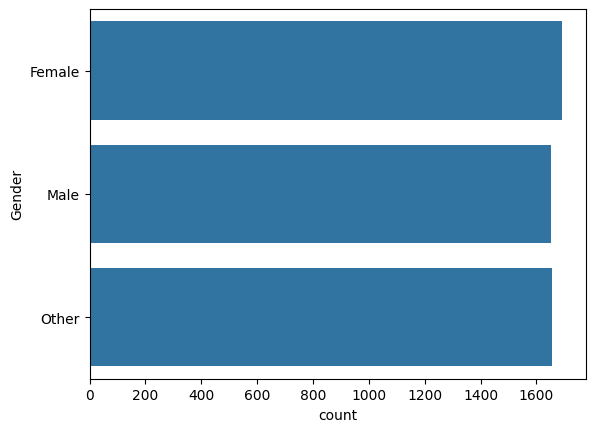

In [16]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [18]:
df1=pd.DataFrame({'Gender':['male','female','other']})

In [19]:
df1.head()

,Gender
0,male
1,female
2,other


In [20]:
lbl_encoder=LabelEncoder()

In [21]:
df1['Gender_encoded']=lbl_encoder.fit_transform(df1[['Gender']])


/opt/anaconda3/envs/mlcoe/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
lbl_encoder.transform([['male']])

/opt/anaconda3/envs/mlcoe/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

In [23]:
lbl_encoder.transform([['female']])

/opt/anaconda3/envs/mlcoe/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [24]:
lbl_encoder.transform([['other']])

/opt/anaconda3/envs/mlcoe/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [25]:
df.head()

,Student_ID,Gender,Study_Hours,Family_Income,Attendance,Test_Score,Extra_Activities,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job
0,1,Female,8.0,Medium,83,70.0,Sports,No,High School,Private,Good,Yes
1,2,Male,NaN,NaN,68,94.0,Debate,Yes,PhD,Private,Good,Yes
2,3,Male,3.0,Low,92,65.0,Sports,No,PhD,Government,Excellent,Yes
3,4,Other,9.0,Medium,75,44.0,Debate,Yes,Bachelor,Private,Good,No
4,5,Other,0.0,Medium,91,3.0,Sports,No,PhD,Private,Poor,Yes


In [26]:
df.isnull().sum()                              


Student_ID               0
Gender                   0
Study_Hours            250
Family_Income          250
Attendance               0
Test_Score             249
Extra_Activities      1233
Internet_Access          0
Parental_Education       0
School_Type              0
Health_Status            0
Part_Time_Job            0
dtype: int64

In [27]:
df.shape

(5000, 12)

In [28]:
df=df.drop('Extra_Activities', axis=1)

In [29]:
df.head()

,Student_ID,Gender,Study_Hours,Family_Income,Attendance,Test_Score,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job
0,1,Female,8.0,Medium,83,70.0,No,High School,Private,Good,Yes
1,2,Male,NaN,NaN,68,94.0,Yes,PhD,Private,Good,Yes
2,3,Male,3.0,Low,92,65.0,No,PhD,Government,Excellent,Yes
3,4,Other,9.0,Medium,75,44.0,Yes,Bachelor,Private,Good,No
4,5,Other,0.0,Medium,91,3.0,No,PhD,Private,Poor,Yes


In [30]:
min_val, Q1, median, Q3, max_val = np.quantile(df['Study_Hours'], [0, 0.25, 0.5, 0.75, 1.0])


In [31]:
min_val, Q1, median, Q3, max_val

(np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan))

In [32]:
cleaned = df['Study_Hours'].dropna()
min_val, Q1, median, Q3, max_val = np.quantile(cleaned, [0, 0.25, 0.5, 0.75, 1.0])

print("Min:", min_val)
print("Q1:", Q1)
print("Median:", median)
print("Q3:", Q3)
print("Max:", max_val)


Min: 0.0
Q1: 4.0
Median: 9.0
Q3: 15.0
Max: 19.0


In [33]:
cleaned.mean()

np.float64(9.513894736842106)

In [34]:
IQR=Q3-Q1

In [35]:
print(IQR)

11.0


In [36]:
lower_fence=Q1-1.5*(IQR)
print(lower_fence)

-12.5


In [37]:
higher_fence=Q3+1.5*(IQR)
print(higher_fence)

31.5


In [38]:
df['Study_Hours']=df['Study_Hours'].fillna(cleaned.mean())

In [39]:
df.isnull().sum()

Student_ID              0
Gender                  0
Study_Hours             0
Family_Income         250
Attendance              0
Test_Score            249
Internet_Access         0
Parental_Education      0
School_Type             0
Health_Status           0
Part_Time_Job           0
dtype: int64

In [40]:
df.head()

,Student_ID,Gender,Study_Hours,Family_Income,Attendance,Test_Score,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job
0,1,Female,8.000000,Medium,83,70.0,No,High School,Private,Good,Yes
1,2,Male,9.513895,NaN,68,94.0,Yes,PhD,Private,Good,Yes
2,3,Male,3.000000,Low,92,65.0,No,PhD,Government,Excellent,Yes
3,4,Other,9.000000,Medium,75,44.0,Yes,Bachelor,Private,Good,No
4,5,Other,0.000000,Medium,91,3.0,No,PhD,Private,Poor,Yes


***Handling NaN values in Categorial Feature***

In [41]:
df[df['Family_Income'].isnull()]

,Student_ID,Gender,Study_Hours,Family_Income,Attendance,Test_Score,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job
1,2,Male,9.513895,NaN,68,94.0,Yes,PhD,Private,Good,Yes
6,7,Female,3.000000,NaN,66,59.0,Yes,Master,Government,Excellent,Yes
12,13,Female,5.000000,NaN,55,34.0,Yes,Master,Government,Good,No
53,54,Male,10.000000,NaN,87,NaN,Yes,PhD,Government,Poor,Yes
126,127,Male,3.000000,NaN,76,100.0,No,High School,Private,Poor,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4955,4956,Female,1.000000,NaN,90,5.0,No,PhD,Government,Poor,Yes
4956,4957,Female,12.000000,NaN,64,89.0,No,High School,Private,Average,No
4962,4963,Other,14.000000,NaN,74,85.0,No,PhD,Private,Poor,No
4978,4979,Other,10.000000,NaN,65,48.0,No,Master,Government,Good,Yes


In [42]:
df['Family_Income'].unique()

array(['Medium', nan, 'Low', 'High'], dtype=object)

In [43]:
mode_value = df[df['Family_Income'].notna()]['Family_Income'].mode()[0]

In [44]:
df['Family_Income_mode'] = df['Family_Income'].fillna(mode_value)

In [45]:
df[['Family_Income_mode','Family_Income']]

,Family_Income_mode,Family_Income
0,Medium,Medium
1,Low,NaN
2,Low,Low
3,Medium,Medium
4,Medium,Medium
...,...,...
4995,High,High
4996,High,High
4997,Low,Low
4998,Low,Low


In [46]:
df.isnull().sum()

Student_ID              0
Gender                  0
Study_Hours             0
Family_Income         250
Attendance              0
Test_Score            249
Internet_Access         0
Parental_Education      0
School_Type             0
Health_Status           0
Part_Time_Job           0
Family_Income_mode      0
dtype: int64

In [47]:
df= df.drop('Family_Income', axis=1)

In [48]:
df.isnull().sum()

Student_ID              0
Gender                  0
Study_Hours             0
Attendance              0
Test_Score            249
Internet_Access         0
Parental_Education      0
School_Type             0
Health_Status           0
Part_Time_Job           0
Family_Income_mode      0
dtype: int64

In [49]:
df['Test_Score'].isnull().sum()
df['Test_Score'].unique()

array([  70.,   94.,   65.,   44.,    3.,    0.,   59.,   49.,   86.,
         46.,   16.,   85.,   34.,    7.,   55.,   54.,    6.,   64.,
         24.,   23.,   96.,   74.,   95.,   92.,   28.,   30.,   56.,
         98.,   31.,   93.,   60.,   75.,   63.,    9.,   25.,   68.,
         72.,   36.,   29.,   nan,   41.,   67.,   89.,   78.,   84.,
          5.,   73.,    1.,    8.,   80.,   79.,   58.,   91.,   12.,
         45.,   14.,   22.,   37.,   33.,   88.,   15.,  100.,   61.,
         11.,   71.,   83.,   27.,   87.,   10.,   32.,    2.,   66.,
         19.,   26.,   40.,   50.,   90.,   99.,   69.,   39.,    4.,
         13.,   52.,   62.,   76.,   21.,   51.,   42.,   77.,   48.,
         53.,   82.,   17.,   20.,   38.,   97.,   57.,   47.,   43.,
         18.,   81.,   35.,  500.,  300.,  250.,  200.,  400., 1000.,
        150.,   -5.,  -10.])

In [50]:
min_val, Q1, median, Q3, max_val = np.quantile(df['Test_Score'], [0, 0.25, 0.5, 0.75, 1.0])


In [51]:
min_val, Q1, median, Q3, max_val

(np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan),
 np.float64(nan))

In [52]:
cleaned1 = df['Test_Score'].dropna()
min_val1, Q01, median1, Q03, max_val1 = np.quantile(cleaned1, [0, 0.25, 0.5, 0.75, 1.0])

print("Min:", min_val1)
print("Q1:", Q01)
print("Median:", median1)
print("Q3:", Q03)
print("Max:", max_val1)


Min: -10.0
Q1: 26.0
Median: 50.0
Q3: 76.0
Max: 1000.0


In [53]:
cleaned1.mean()

np.float64(51.00505156809093)

In [54]:
IQR1=Q03-Q01

In [55]:
print(IQR1)

50.0


In [56]:
lower_fence1=Q01-1.5*(IQR1)
print(lower_fence1)

-49.0


In [57]:
higher_fence1=Q03+1.5*(IQR1)
print(higher_fence1)

151.0


<Axes: ylabel='Test_Score'>

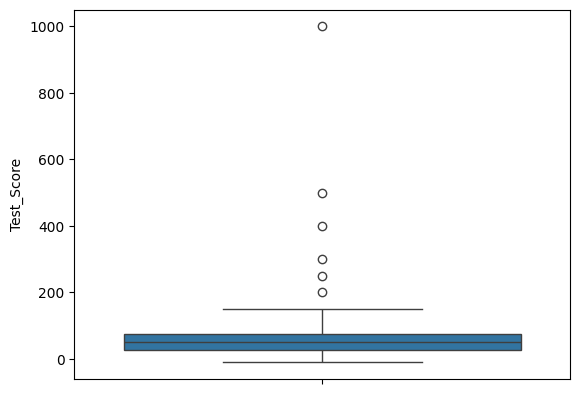

In [58]:
sns.boxplot(cleaned1)

In [59]:
df_no_outliers = df[(df['Test_Score'] >= lower_fence1) & (df['Test_Score'] <= higher_fence1)]

In [60]:
df = df_no_outliers
df.head()

,Student_ID,Gender,Study_Hours,Attendance,Test_Score,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job,Family_Income_mode
0,1,Female,8.000000,83,70.0,No,High School,Private,Good,Yes,Medium
1,2,Male,9.513895,68,94.0,Yes,PhD,Private,Good,Yes,Low
2,3,Male,3.000000,92,65.0,No,PhD,Government,Excellent,Yes,Low
3,4,Other,9.000000,75,44.0,Yes,Bachelor,Private,Good,No,Medium
4,5,Other,0.000000,91,3.0,No,PhD,Private,Poor,Yes,Medium


In [61]:
df.shape

(4745, 11)

In [62]:
df['Test_Score'].unique()

array([ 70.,  94.,  65.,  44.,   3.,   0.,  59.,  49.,  86.,  46.,  16.,
        85.,  34.,   7.,  55.,  54.,   6.,  64.,  24.,  23.,  96.,  74.,
        95.,  92.,  28.,  30.,  56.,  98.,  31.,  93.,  60.,  75.,  63.,
         9.,  25.,  68.,  72.,  36.,  29.,  41.,  67.,  89.,  78.,  84.,
         5.,  73.,   1.,   8.,  80.,  79.,  58.,  91.,  12.,  45.,  14.,
        22.,  37.,  33.,  88.,  15., 100.,  61.,  11.,  71.,  83.,  27.,
        87.,  10.,  32.,   2.,  66.,  19.,  26.,  40.,  50.,  90.,  99.,
        69.,  39.,   4.,  13.,  52.,  62.,  76.,  21.,  51.,  42.,  77.,
        48.,  53.,  82.,  17.,  20.,  38.,  97.,  57.,  47.,  43.,  18.,
        81.,  35., 150.,  -5., -10.])

In [63]:
df.isnull().sum()

Student_ID            0
Gender                0
Study_Hours           0
Attendance            0
Test_Score            0
Internet_Access       0
Parental_Education    0
School_Type           0
Health_Status         0
Part_Time_Job         0
Family_Income_mode    0
dtype: int64